# Table of Contents
* [Instructions](#Instructions)
* [Python Import](#Python-Import)
* [Create Homogeneous 2D Data](#Create-Homogeneous-2D-Data)
	* [Define Data Characteristics](#Define-Data-Characteristics)
	* [Create 1D Data](#Create-1D-Data)
	* [Create 2D Data](#Create-2D-Data)
	* [Export Image (FITS and TIFF)](#Export-Image-%28FITS-and-TIFF%29)
		* [FITS](#FITS)
		* [TIFF](#TIFF)
* [Create Inhomogeneous 2D Data](#Create-Inhomogeneous-2D-Data)
	* [Define Data Characteristics](#Define-Data-Characteristics)
	* [Create 1D Data](#Create-1D-Data)
	* [Create 2D Data](#Create-2D-Data)
	* [Export Image (FITS and TIFF)](#Export-Image-%28FITS-and-TIFF%29)
		* [FITS](#FITS)
		* [TIFF](#TIFF)


# Instructions 

This notebook will allow to create fits/tiff images of fake cylindrical samples with user defined intensity

# Python Import

In [1]:
# from plotly.offline import plot, init_notebook_mode, iplot
# init_notebook_mode()
# import plotly.plotly as py
# import plotly.graph_objs as go
# from plotly import tools

import numpy as np

from IPython.display import Image
from IPython.core.display import HTML

import matplotlib.pyplot as plt
%matplotlib inline

import file_handler

# Create full cylinder 2D Data 

In [2]:
Image(url="images/homogeneous_cylinder_2d_image.png", width=750, height=750, unconfined=True)

## Define Data Characteristics 

In [53]:
#image size
width, height = 512, 512

pixel_intensity = 8
radius = 200
pixel_center = 256

# reset
if 'circle_matrix' in globals() or 'circle_matrix' in vars():
    del circle_matrix
    del circle_matrix_bool
    del homogeneous_image
    cirlce_matrix = None
    circle_matrix_bool = None
    homogeneous_image = None

## Create 1D Data 

In [54]:
def is_point_inside_circle(x,y):
    _r = x*x + y*y
    if np.sqrt(_r) <= radius:
        return True
    return False

x_range = np.arange(-radius, radius+1)
y_range = np.arange(-radius, radius+1)

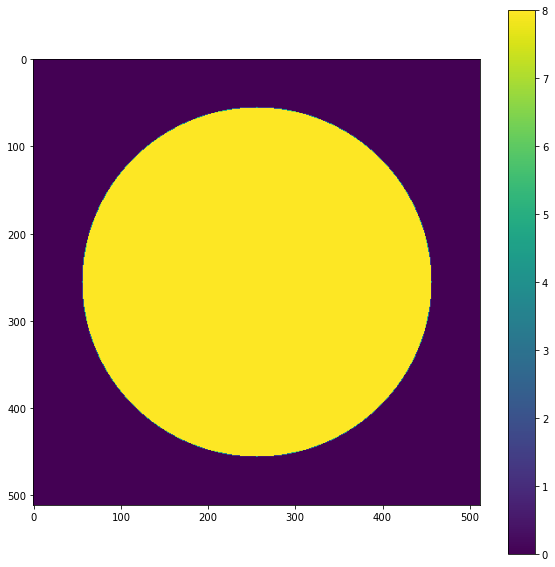

In [55]:
circle_matrix_bool = np.empty([height, width], dtype=bool)
circle_matrix_bool[:] = False
border = pixel_center - radius
for x in x_range:
    for y in y_range:
        _result = is_point_inside_circle(x, y)
        circle_matrix_bool[pixel_center+x, pixel_center+y] = _result
        
circle_matrix = np.zeros([height, width])
circle_matrix[:] = 0
circle_matrix[circle_matrix_bool] = pixel_intensity

fig =  plt.figure(figsize=(10,10))
ax_img = plt.subplot(111)
pos=ax_img.imshow(circle_matrix)
fig.colorbar(pos)

In [56]:
projected_image = np.sum(circle_matrix, axis=0)

## Create 2D Data 

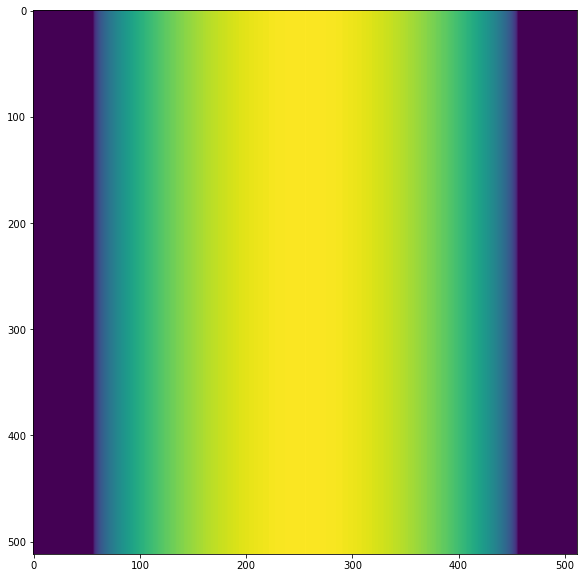

In [57]:
homogeneous_image = np.zeros([height, width], dtype=float)

for h in np.arange(height):
    homogeneous_image[h, :] = projected_image
    
fig1 =  plt.figure(figsize=(10,10))
ax_img = plt.subplot(111)
ax_img.imshow(homogeneous_image)

## Export Image (FITS and TIFF) 

### FITS

In [58]:
output_file_name = 'data/fits/full_cylinder_px_intensity_{}.fits'.format(pixel_intensity)
file_handler.make_fits(filename=output_file_name, data=homogeneous_image)

### TIFF

In [59]:
# homogeneous_image = homogeneous_image / np.max(homogeneous_image) * 256
output_file_name = 'data/tiff/full_cylinder_px_intensity_{}.tif'.format(pixel_intensity)
file_handler.make_tiff(filename=output_file_name, data=homogeneous_image)

# Create hollow cylinder 2D Data 

## Data of Interest are in the Outer Ring

In [22]:
Image(url="images/inhomogeneous_cylinder_2d_image.png", width=750, height=750, unconfined=True)

### Define Data Characteristics 

In [81]:
#image size
width, height = 512, 512

pixel_intensity = 8
inner_radius = 150
outer_radius = 200
pixel_center = 256

# reset
if 'circle_matrix' in globals() or 'circle_matrix' in vars():
    del circle_matrix
    cirlce_matrix = None

if 'circle_matrix_bool' in globals():
    del circle_matrix_bool
    circle_matrix_bool = None
    
if 'inhomogeneous_image' in globals():
    del inhomogeneous_image
    inhomogeneous_image = None

### Create 1D Data 

In [82]:
def is_point_inside_circle(x,y,r):
    _r = x*x + y*y
    if np.sqrt(_r) <= r:
        return True
    return False

def is_point_outside_circle(x,y,r):
    _r = x*x + y*y
    if np.sqrt(_r) > r:
        return True
    return False

x_range = np.arange(-outer_radius, outer_radius+1)
y_range = np.arange(-outer_radius, outer_radius+1)

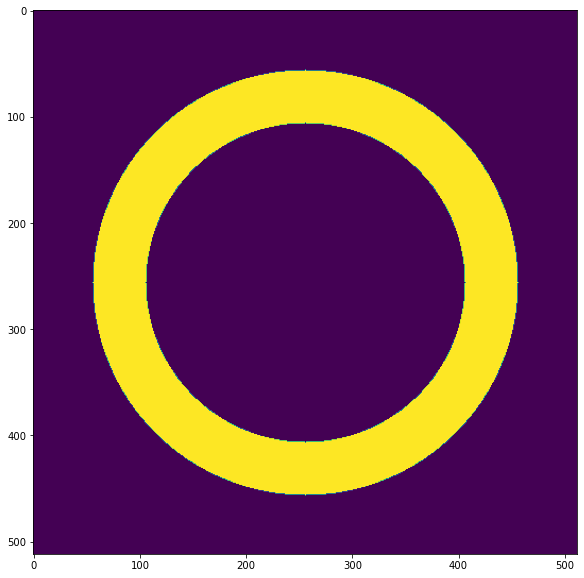

In [83]:
circle_matrix_bool = np.empty([height, width], dtype=bool)
circle_matrix_bool[:] = False
border = pixel_center - outer_radius
for x in x_range:
    for y in y_range:
        _result = is_point_inside_circle(x, y, outer_radius)
        if _result:
            _result = is_point_outside_circle(x, y, inner_radius)
        circle_matrix_bool[pixel_center+x, pixel_center+y] = _result
        
circle_matrix = np.zeros([height, width])
circle_matrix[:] = 0
circle_matrix[circle_matrix_bool] = pixel_intensity

fig =  plt.figure(figsize=(10,10))
ax_img = plt.subplot(111)
ax_img.imshow(circle_matrix)

In [84]:
inhomogeneous_projected_image = np.sum(circle_matrix, axis=0)

### Create 2D Data 

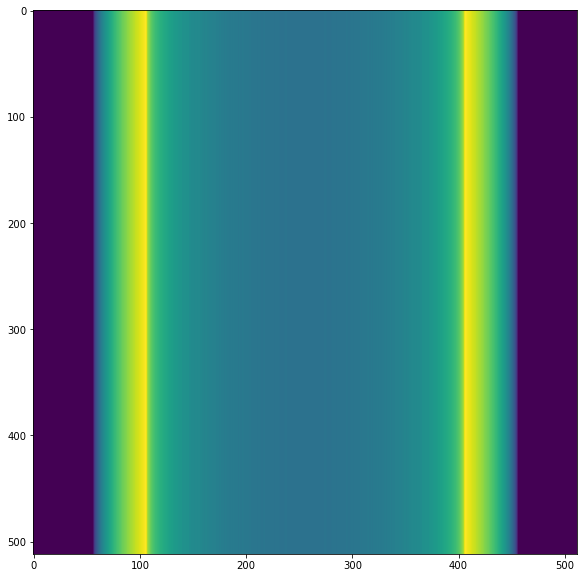

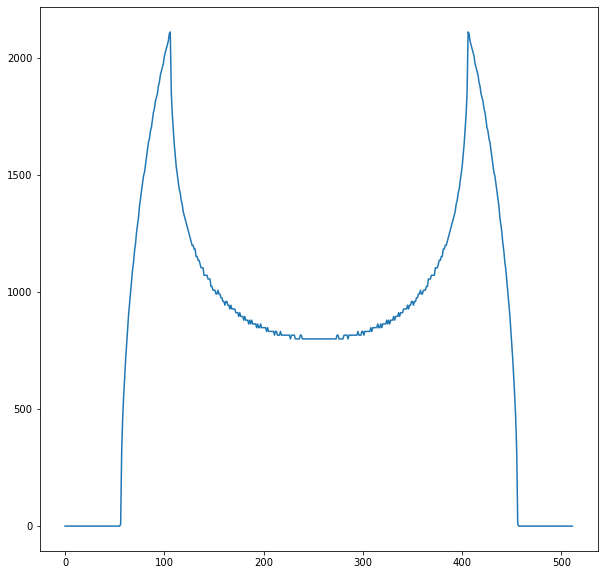

In [85]:
inhomogeneous_image = np.zeros([height, width], dtype=float)

for h in np.arange(height):
    inhomogeneous_image[h, :] = inhomogeneous_projected_image
    
fig1 =  plt.figure(figsize=(10,10))
ax_img = plt.subplot(111)
ax_img.imshow(inhomogeneous_image)

fig2 =  plt.figure(figsize=(10,10))
ax_img = plt.subplot(111)
ax_img.plot(inhomogeneous_image[0,:])

### Export Image (FITS and TIFF) 

#### FITS

In [86]:
output_file_name = 'data/fits/hollow_cylinder_image_px_intensity_{}.fits'.format(pixel_intensity)
file_handler.make_fits(filename=output_file_name, data=inhomogeneous_image)

#### TIFF

In [87]:
output_file_name = 'data/tiff/hollow_cylinder_image_px_intensity_{}.tif'.format(pixel_intensity)
file_handler.make_tiff(filename=output_file_name, data=inhomogeneous_image)

# Create full cylinder data with thick walls 

## Data of Interest are in the Inner Cylinder

In [31]:
Image(url="images/inhomogeneous_cylinder_inner_and_outer_material.png", width=750, height=750, unconfined=True)

### Define Data Characteristics 

In [109]:
#image size
width, height = 512, 512

ring_pixel_intensity = 2
inner_pixel_intensity = 8
inner_radius = 150
outer_radius = 200
pixel_center = 256

# reset
if 'circle_matrix' in globals() or 'circle_matrix' in vars():
    del circle_matrix
    cirlce_matrix = None

if 'circle_matrix_bool' in globals():
    del circle_matrix_bool
    circle_matrix_bool = None
    
if 'inhomogeneous_image' in globals():
    del inhomogeneous_image
    inhomogeneous_image = None

### Create 1D Data 

In [110]:
def is_point_inside_circle(x,y,r):
    _r = x*x + y*y
    if np.sqrt(_r) <= r:
        return True
    return False

def is_point_outside_circle(x,y,r):
    _r = x*x + y*y
    if np.sqrt(_r) > r:
        return True
    return False

x_range = np.arange(-outer_radius, outer_radius+1)
y_range = np.arange(-outer_radius, outer_radius+1)

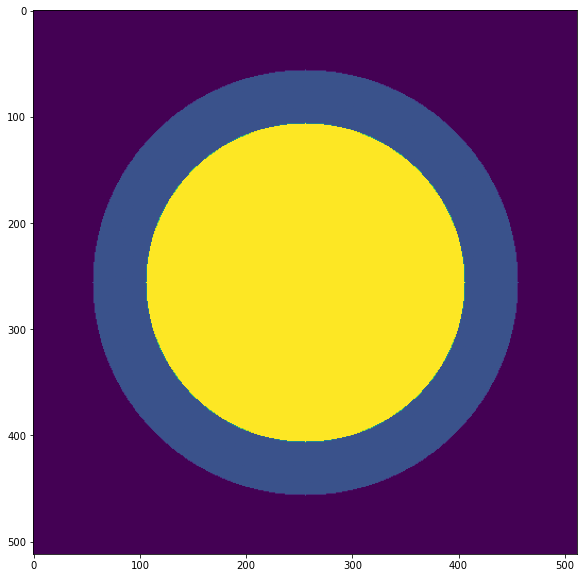

In [111]:
circle_matrix_bool = np.empty([height, width], dtype=bool)
circle_matrix_bool[:] = False
border = pixel_center - outer_radius

circle_matrix = np.zeros([height, width])
circle_matrix[:] = 0

# fill inner cirlce
for x in x_range:
    for y in y_range:
        _result = is_point_inside_circle(x, y, inner_radius)
        circle_matrix_bool[pixel_center+x, pixel_center+y] = _result

circle_matrix[circle_matrix_bool] = inner_pixel_intensity

# fill ring
for x in x_range:
    for y in y_range:
        _result = is_point_inside_circle(x, y, outer_radius)
        if _result:
            _result = is_point_outside_circle(x, y, inner_radius)
        circle_matrix_bool[pixel_center+x, pixel_center+y] = _result
        
circle_matrix[circle_matrix_bool] = ring_pixel_intensity

fig =  plt.figure(figsize=(10,10))
ax_img = plt.subplot(111)
ax_img.imshow(circle_matrix)

In [112]:
inhomogeneous_projected_image = np.sum(circle_matrix, axis=0)

### Create 2D Data 

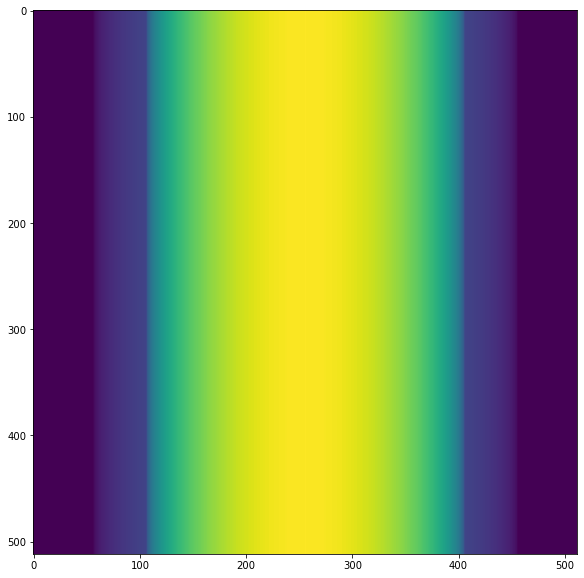

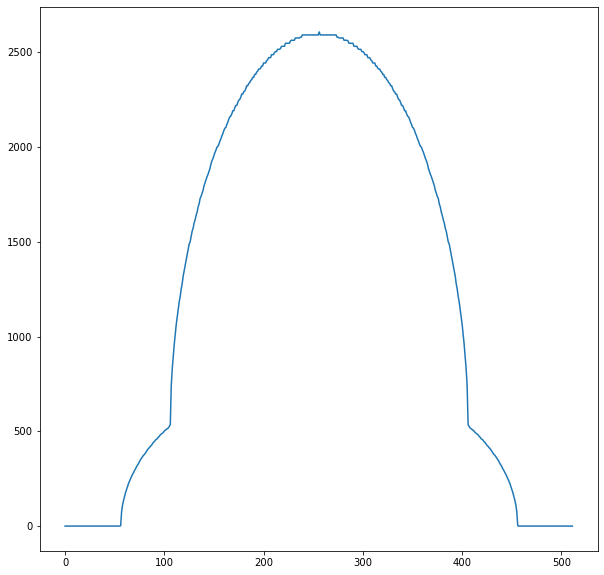

In [113]:
inhomogeneous_image = np.zeros([height, width], dtype=float)

for h in np.arange(height):
    inhomogeneous_image[h, :] = inhomogeneous_projected_image
    
fig1 =  plt.figure(figsize=(10,10))
ax_img = plt.subplot(111)
ax_img.imshow(inhomogeneous_image)

fig2 =  plt.figure(figsize=(10,10))
ax_img = plt.subplot(111)
ax_img.plot(inhomogeneous_image[0,:])



### Export Image (FITS and TIFF) 

#### FITS

In [114]:
output_file_name = 'data/fits/full_cylinder_with_thick_wall_image_px_inner_intensity_{}_px_outer_intensity_{}.fits'.format(inner_pixel_intensity, ring_pixel_intensity)
file_handler.make_fits(filename=output_file_name, data=inhomogeneous_image)

#### TIFF

In [115]:
output_file_name = 'data/tiff/full_cylinder_with_thick_wall_image_px_inner_intensity_{}_px_outer_intensity_{}.tif'.format(inner_pixel_intensity, ring_pixel_intensity)
file_handler.make_tiff(filename=output_file_name, data=inhomogeneous_image)